<a href="https://colab.research.google.com/github/kida0/save-note-files/blob/main/NOTE_ImbalanedDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import pathlib

In [ ]:
import imblearn
import collections

In [ ]:
data = pd.read_csv('/content/train.csv')
data.shape

(14095, 54)

In [ ]:
data = data.dropna(axis=1)
data = data.iloc[:, 5:]
data.shape

(14095, 30)

In [ ]:
data.Y_LABEL.value_counts(normalize=True)

0    0.914651
1    0.085349
Name: Y_LABEL, dtype: float64

In [ ]:
X = data.drop('Y_LABEL', axis=1)
y = data['Y_LABEL']

# __Over-sampling__

## __Naive random over-sampling__

In [ ]:
print('Sampling 이전 데이터 크기:', X.shape, y.shape)
print('Sampling 이전 y 비율:\n', y.value_counts())

Sampling 이전 데이터 크기: (14095, 29) (14095,)
Sampling 이전 y 비율:
 0    12892
1     1203
Name: Y_LABEL, dtype: int64


In [ ]:
iit = imblearn.over_sampling.RandomOverSampler(random_state=0)
X_resampled, y_resampled = iit.fit_resample(X, y)
print('Sampling 이후 데이터 크기', X_resampled.shape, y_resampled.shape)

Sampling 이후 데이터 크기 (25784, 29) (25784,)


In [ ]:
print(sorted(collections.Counter(y_resampled).items()))

[(0, 12892), (1, 12892)]


## __SMOTE__
1. 소수범주 데이터 하나 무작위 선택 ($x$)
2. $x$를 기준으로 KNN
3. KNN에 속하는 값 선택 ($x_{NN}$)
4. $x_{synthetic} = x + \mu*(x_{NN} - x)$
5. 소수범주 데이터에 대해 1.~4. 반복

In [ ]:
X_resampled, y_resampled = imblearn.over_sampling.SMOTE(
    k_neighbors = 5,
).fit_resample(X, y)
print(sorted(collections.Counter(y_resampled).items()))

[(0, 12892), (1, 12892)]


## __BorderlineSMOTE, SVMSMOTE, KMeansSMOTE__
- Borderline의 경우 SMOTE의 2. 과정에서 K개 중 다수 클래스의 수($m$)를 고려하여 Borderline에 대해서만 SMOTE 수행
    1. $k = m$ → 전부 다수클래스로 borderline이 아님
    2. $k/2 < m \leq k$ → 절반 이상이 다수 클래스로 borderline에 속함
    3. $0 \leq m \leq k/2$ → borderline이 아님

- SVMSMOTE는 KNN대신 SVM 이용


In [ ]:
X_resampled, y_resampled = imblearn.over_sampling.BorderlineSMOTE(
    k_neighbors = 5,
    m_neighbors = 10,
).fit_resample(X, y)
print(sorted(collections.Counter(y_resampled).items()))

[(0, 12892), (1, 12892)]


In [ ]:
X_resampled, y_resampled = imblearn.over_sampling.SVMSMOTE().fit_resample(X, y)
print(sorted(collections.Counter(y_resampled).items()))

[(0, 12892), (1, 12892)]


In [ ]:
# X_resampled, y_resampled = imblearn.over_sampling.KMeansSMOTE().fit_resample(X, y)
# print(sorted(collections.Counter(y_resampled).items()))

## __ADASYN__
- BorderlineSMOTE와 비슷
    1. 다수범주의 비율 $r_i = m_k / k$, i번째 소수범주 $x_i$
    2. 1.을 모든 i에 대해 계산 후 합이 1이 되도록 정규화 = $\hat{r_i}$
    3. G = #다수 - #소수
    4. i를 기준으로 오버샘플링 할 갯수 = G * $\hat{r_i}$


In [ ]:
X_resampled, y_resampled = imblearn.over_sampling.ADASYN().fit_resample(X, y)
print(sorted(collections.Counter(y_resampled).items()))

[(0, 12892), (1, 13027)]


## __SMOTENC__
- mixture of numerical and categorical

In [ ]:
smote_nc = imblearn.over_sampling.SMOTENC(categorical_features=[0])
X_resampled, y_resampled = smote_nc.fit_resample(X, y)
print(sorted(collections.Counter(y_resampled).items()))

[(0, 12892), (1, 12892)]


## __SMOTE variant__
* only with categorical

In [ ]:
sampler = imblearn.over_sampling.SMOTE()
X_resampled, y_res = sampler.fit_resample(X, y)

In [ ]:
data.ANONYMOUS_2.value_counts()

200     9197
550      723
375      562
900      107
1600      72
        ... 
1369       1
598        1
1301       1
291        1
308        1
Name: ANONYMOUS_2, Length: 842, dtype: int64

# __Under-sampling__

## __Random under-sampling__

In [ ]:
iit = imblearn.under_sampling.RandomUnderSampler()
X_resampled, y_resampled = iit.fit_resample(X, y)
print(sorted(collections.Counter(y_resampled).items()))

[(0, 1203), (1, 1203)]


## __NearMiss__

In [ ]:
iit = imblearn.under_sampling.NearMiss()
X_resampled, y_resampled = iit.fit_resample(X, y)
print(sorted(collections.Counter(y_resampled).items()))

[(0, 1203), (1, 1203)]


##__Tomek's links__
- 가까운 점끼리 묶은 후 다수 범주 값 제거

In [ ]:
iit = imblearn.under_sampling.TomekLinks()
X_resampled, y_resampled = iit.fit_resample(X, y)
print(sorted(collections.Counter(y_resampled).items()))

[(0, 12501), (1, 1203)]


## __Edited Nearset Neighbours__
- clean the database by removing samples close to the decision boundary
- __'mode'__: the majority vote of the neighbours will be used in order to exclude a sample (more conservative)

In [ ]:
iit = imblearn.under_sampling.EditedNearestNeighbours(
    n_neighbors = 3,
    kind_sel = 'all',   # ['all', 'mode']
)
X_resampled, y_resampled = iit.fit_resample(X, y)
print(sorted(collections.Counter(y_resampled).items()))

[(0, 10659), (1, 1203)]


## __Condensed Nearest Neighbor__
1. 다수범주에 속하는 값 선택 ($i \in S_0$)
2. 다수범주에 속하는 값을 선택하며 1-NN 수행 ($j \in S_0$)
3. 다수범주에서 소수범주로 분류된 값과 i만 남기고 나머지 샘플 제거

In [ ]:
iit = imblearn.under_sampling.CondensedNearestNeighbour()
X_resampled, y_resampled = iit.fit_resample(X, y)
print(sorted(collections.Counter(y_resampled).items()))

## __One-sided selection__
- Tomek(경계면 값 제거) + CNN(경계면에서 먼 값 제거)
- __n_neighbors__: size of the neighbourhood to consider to compute the nearset neighbors

In [ ]:
iit = imblearn.under_sampling.OneSidedSelection(
    n_neighbors = None,     # None -> 1-NN
)
X_resampled, y_resampled = iit.fit_resample(X, y)
print(sorted(collections.Counter(y_resampled).items()))

[(0, 12486), (1, 1203)]


## __Neighbourhood cleaning rule__

In [ ]:
iit = imblearn.under_sampling.NeighbourhoodCleaningRule()
X_resampled, y_resampled = iit.fit_resample(X, y)
print(sorted(collections.Counter(y_resampled).items()))

[(0, 10322), (1, 1203)]


## __Instance hardness threshold__
- 지정한 알고리즘을 통해 데이터를 학습 후 낮은 확률을 가진 관측치 제거

In [ ]:
from sklearn import linear_model
iit = imblearn.under_sampling.InstanceHardnessThreshold(
    estimator = linear_model.LogisticRegression(),
)
X_resampled, y_resampled = iit.fit_resample(X, y)
print(sorted(collections.Counter(y_resampled).items()))

In [ ]:
from sklearn import linear_model
iit = imblearn.under_sampling.InstanceHardnessThreshold()
X_resampled, y_resampled = iit.fit_resample(X, y)
print(sorted(collections.Counter(y_resampled).items()))

[(0, 1497), (1, 1203)]


# __Combination of over- and under- sampling__

## __SMOTEENN__
- Over-sampling using SMOTE and cleaning using ENN

In [ ]:
iit = imblearn.combine.SMOTEENN(
    smote = None,
    enn = None,
)
X_resampled, y_resampled = iit.fit_resample(X, y)
print(sorted(collections.Counter(y_resampled).items()))

[(0, 8579), (1, 11774)]


## __STMOETomek__
- Over-sampling using SMOTE and cleaning using Tomek links

In [ ]:
iit = imblearn.combine.SMOTETomek(
    smote = None,
    tomek = None,
)
X_resampled, y_resampled = iit.fit_resample(X, y)
print(sorted(collections.Counter(y_resampled).items()))

[(0, 12728), (1, 12728)]


# __Compare time for resampling method__

In [ ]:
models = [
    # over-sampling
    imblearn.over_sampling.RandomOverSampler(),
    imblearn.over_sampling.SMOTE(),
    imblearn.over_sampling.ADASYN(),
    imblearn.over_sampling.BorderlineSMOTE(),
    imblearn.over_sampling.SVMSMOTE(),

    # under_sampling
    imblearn.under_sampling.RandomUnderSampler(),
    imblearn.under_sampling.NearMiss(),
    imblearn.under_sampling.InstanceHardnessThreshold(),
#    imblearn.under_sampling.CondensedNearestNeighbour(),
    imblearn.under_sampling.EditedNearestNeighbours(),
    imblearn.under_sampling.OneSidedSelection(),
    imblearn.under_sampling.NeighbourhoodCleaningRule(),
    imblearn.under_sampling.TomekLinks(),

    # combinations
    imblearn.combine.SMOTEENN(),
    imblearn.combine.SMOTETomek(),
]

In [ ]:
imb_columns = ['name', 'param', 'time', 'ratio', 'size']
imb_df = pd.DataFrame(columns=imb_columns)

In [ ]:
import time

for idx, model in enumerate(models):
    print(f'{idx}: {model} do...')
    tic = time.time()
    X_resampled, y_resampled = model.fit_resample(X, y)
    toc = time.time()

    imb_df.loc[idx, 'name'] = model.__class__.__name__
    imb_df.loc[idx, 'param'] = str(model.get_params())
    imb_df.loc[idx, 'time'] = round(toc - tic, 4)
    imb_df.loc[idx, 'ratio'] = round((y_resampled==1).sum() / y_resampled.shape[0], 4)
    imb_df.loc[idx, 'size'] = y_resampled.shape[0]

imb_df.insert(loc=0, column='sampling', value=['over'] * 5 + ['under'] * 7 + ['combine'] * 2)

0: RandomOverSampler() do...
1: SMOTE() do...
2: ADASYN() do...
3: BorderlineSMOTE() do...
4: SVMSMOTE() do...
5: RandomUnderSampler() do...
6: NearMiss() do...
7: EditedNearestNeighbours() do...
8: OneSidedSelection() do...
9: NeighbourhoodCleaningRule() do...
10: InstanceHardnessThreshold() do...
11: TomekLinks() do...
12: SMOTEENN() do...
13: SMOTETomek() do...


In [ ]:
dtype_dict = {
    'sampling': 'category',
    'name': 'object',
    'param': 'object',
    'time': 'float',
    'ratio': 'float',
    'size': 'int',
}
imb_df = imb_df.astype(dtype_dict)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

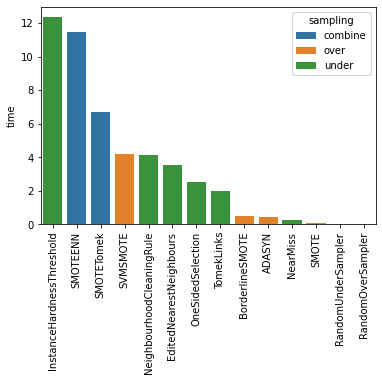

In [ ]:
(sns
 .barplot(data=imb_df.sort_values('time', ascending=False), x='name', y='time', hue='sampling', dodge=False)
 .set(xlabel='')
)
plt.xticks(rotation=90)
plt.show()

# __Compare model step by step__

In [ ]:
from sklearn import model_selection, dummy

dummy_clf = dummy.DummyClassifier(strategy='most_frequent')
scoring = ['accuracy', 'balanced_accuracy']
cv_result = model_selection.cross_validate(dummy_clf, X, y, scoring=scoring)

In [ ]:
index = []
scores = {'Accuracy': [], 'Balanced accuracy': []}

In [ ]:
index += ['Dummy classifier']
cv_result = model_selection.cross_validate(dummy_clf, X, y, scoring=scoring)
scores['Accuracy'].append(cv_result['test_accuracy'].mean())
scores['Balanced accuracy'].append(cv_result['test_balanced_accuracy'].mean())

df_scores = pd.DataFrame(scores, index=index)
df_scores

,Accuracy,Balanced accuracy
Dummy classifier,0.914651,0.5


In [ ]:
from sklearn import preprocessing, pipeline, impute, compose

cont_pipe = pipeline.make_pipeline(
    preprocessing.StandardScaler(), impute.SimpleImputer(strategy='mean', add_indicator=True)
)
cate_pipe = pipeline.make_pipeline(
    impute.SimpleImputer(strategy='constant', fill_value='missing'),
    preprocessing.OneHotEncoder(handle_unknown='ignore')
)
preprocessor_linear = compose.make_column_transformer(
    (cont_pipe, compose.make_column_selector(dtype_include='number')),
    (cate_pipe, compose.make_column_selector(dtype_include='category')),
    n_jobs=2
)
lr_clf = pipeline.make_pipeline(preprocessor_linear, linear_model.LogisticRegression(max_iter=1000))

index += ['Logistic regression']
cv_result = model_selection.cross_validate(lr_clf, X, y, scoring=scoring)
scores['Accuracy'].append(cv_result['test_accuracy'].mean())
scores['Balanced accuracy'].append(cv_result['test_balanced_accuracy'].mean())
df_scores = pd.DataFrame(scores, index=index)

In [ ]:
lr_clf.set_params(logisticregression__class_weight='balanced')

index += ['Logistic resgression with balanced class weights']
cv_result = model_selection.cross_validate(lr_clf, X, y, scoring=scoring)
scores['Accuracy'].append(cv_result['test_accuracy'].mean())
scores['Balanced accuracy'].append(cv_result['test_balanced_accuracy'].mean())
df_scores = pd.DataFrame(scores, index=index)
df_scores

,Accuracy,Balanced accuracy
Dummy classifier,0.914651,0.500000
Logistic regression,0.953033,0.735399
Logistic resgression with balanced class weights,0.908691,0.770702


In [ ]:
from imblearn.pipeline import make_pipeline

lr_clf = make_pipeline(
    preprocessor_linear,
    imblearn.combine.SMOTETomek(),
    linear_model.LogisticRegression(max_iter=1000),
)

index += ['SMOTETomek sampling + Logistic regression']
cv_result = model_selection.cross_validate(lr_clf, X, y, scoring=scoring)
scores['Accuracy'].append(cv_result['test_accuracy'].mean())
scores['Balanced accuracy'].append(cv_result['test_balanced_accuracy'].mean())
df_scores = pd.DataFrame(scores, index=index)

In [ ]:
df_scores

,Accuracy,Balanced accuracy
Dummy classifier,0.914651,0.500000
Logistic regression,0.953033,0.735399
Logistic resgression with balanced class weights,0.908691,0.770702
SMOTETomek sampling + Logistic regression,0.908053,0.773362
